## 梯度下降練習
Wt+1 = Wt  - learning rate * gradient


[-5.   -3.5  -2.45 -1.72 -1.2  -0.84 -0.59 -0.41 -0.29 -0.2  -0.14]


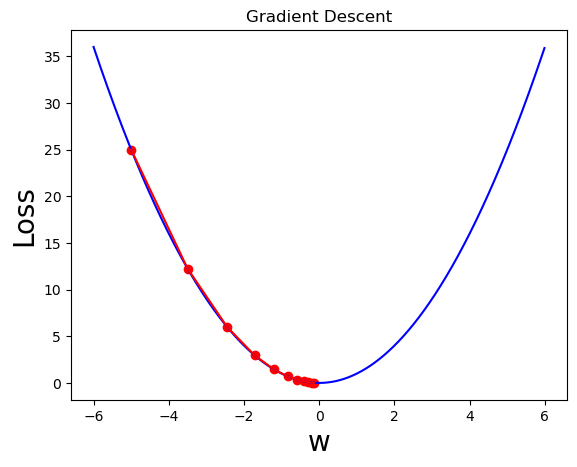

In [23]:
import numpy as np

import matplotlib.pyplot as plt


# 目標函數(損失函數):y=x^2
def func(x): return x ** 2

# 目標函數的一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 權重的更新W_new
        # W_new = W — learning_rate * gradient        
        w += - dx * lr         
        xs[i+1] = w    
    return xs

# Main
# 起始權重
x_start = -5    
# 執行週期數
epochs = 10
# 學習率   
lr = 0.15
# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

from matplotlib.font_manager import FontProperties

plt.title('Gradient Descent')
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

plt.show()


## tensorflow 手寫辨識練習

https://colab.research.google.com/drive/199H8q1MP5FRPCUFk5yEIlauDPhlPH6d8?usp=sharing

## Kmeans

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
# 150筆資料 2個特徵 分成3群 標準差0.5 是否重新洗牌shuffle

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='k-means++',            
            max_iter=300,
            random_state=0)

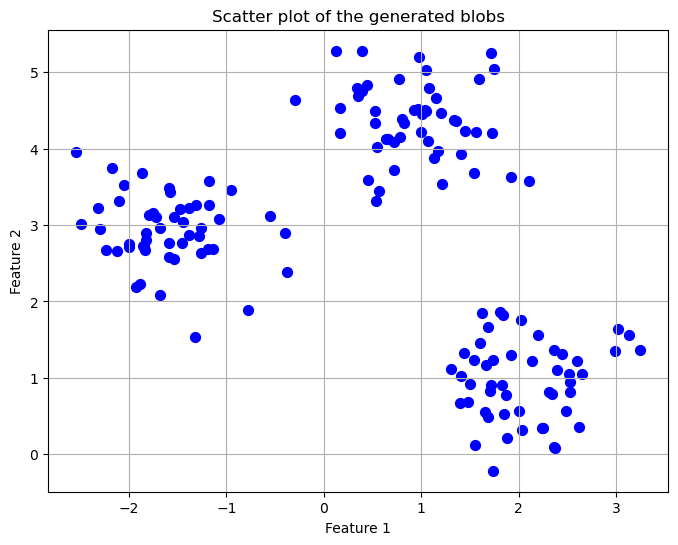

In [4]:
import matplotlib.pyplot as plt
# 繪製散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.title("Scatter plot of the generated blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

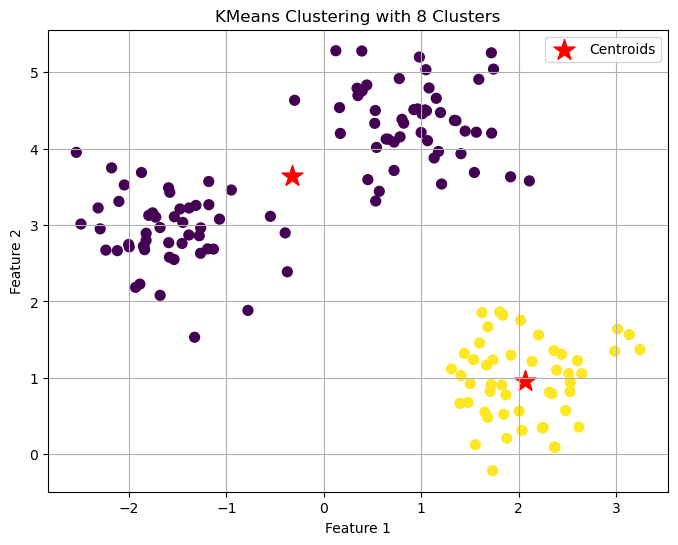

In [5]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_km, marker='o', s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, 
                init='k-means++',            
                max_iter=300,
                random_state=0)
    km.fit(X)
    #km.inertia_ 所有點到它們所屬群中心的距離平方總和（Sum of Squared Distances, SSD）
    #Inertia 越小越好
    distortions.append(km.inertia_)

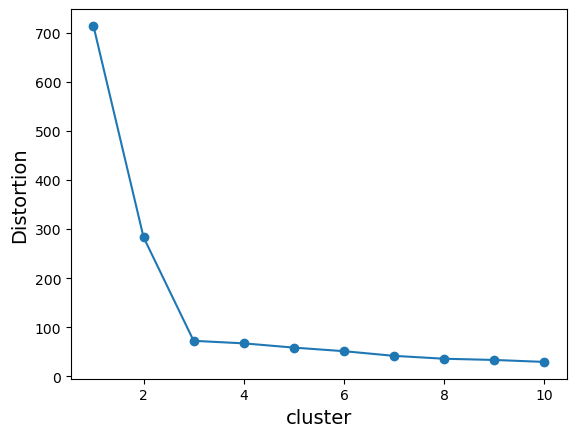

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('cluster', fontsize=14)
plt.ylabel('Distortion', fontsize=14);#失真

In [8]:
km = KMeans(n_clusters=3, 
                init='k-means++',            
                max_iter=300,
                random_state=0)

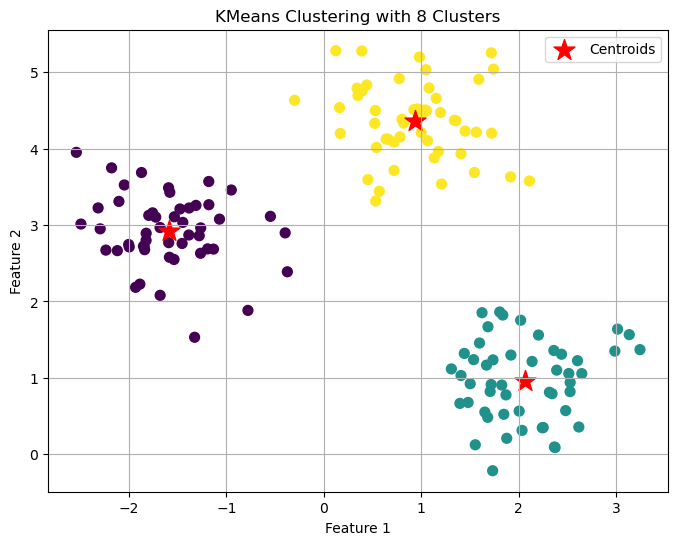

In [9]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_km, marker='o', s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 輪廓分數（Silhouette Score）

是一種衡量分群質量的指標，範圍在 -1 到 1 之間。其分數反映了資料點在分群中的適合程度：

- **接近 1**：表示資料點非常適合當前的群組，且與其他群組的資料點有明顯的距離。這表示該資料點與其分群的相似性高，與其他群組的相似性低，分群效果理想。
  
- **接近 0**：表示資料點位於兩個群組的邊界，可能不適合任何群組或有可能被分到不同的群組。這種情況下，分群效果不明顯，可能需要重新調整分群方法或群數。
  
- **接近 -1**：表示資料點更適合其他群組，而不是當前的群組，這是分群質量差的指標。

因此，**輪廓分數愈接近 1 愈好**，因為這表示資料點明顯屬於某一群組，且與其他群組的資料點有較大的區別，分群的效果較好。這通常是優秀分群模型的特徵。
pip install yellowbrick

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='k-means++',            
            max_iter=300,
            random_state=0)

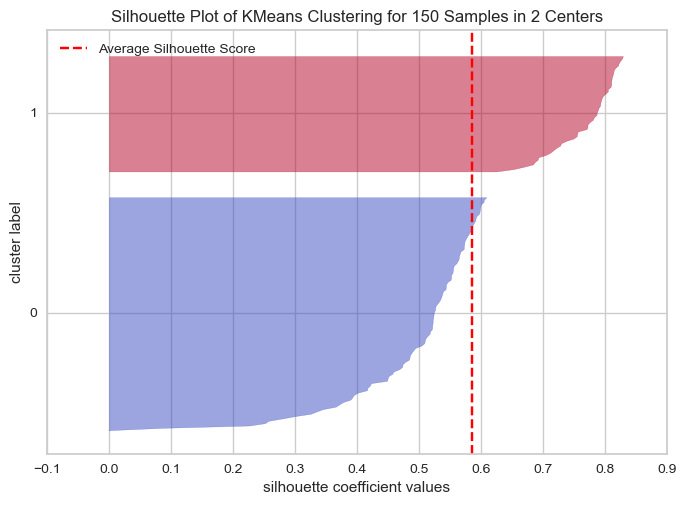

Silhouette Average: 0.58


In [11]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()

silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

In [13]:
km = KMeans(n_clusters=3, 
                init='k-means++',            
                max_iter=300,
                random_state=0)

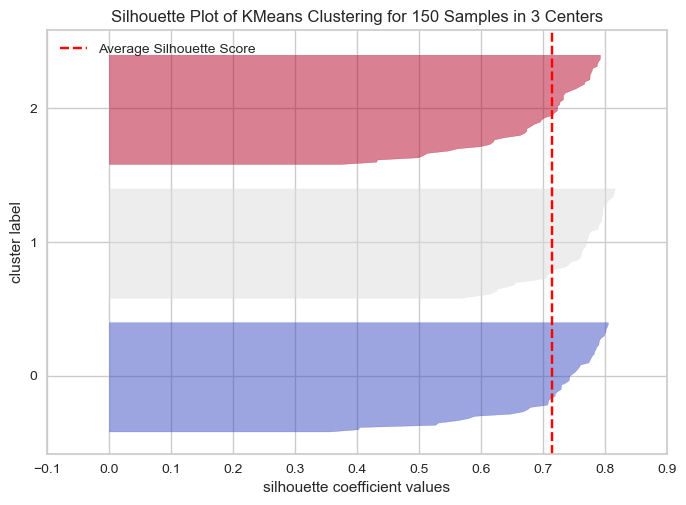

Silhouette Average: 0.71


In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()

silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

# DBSCAN

In [17]:
import os
os.environ['OMP_NUM_THREADS'] = '6'

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
blobs = pd.read_csv("./cluster_blobs.csv")
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


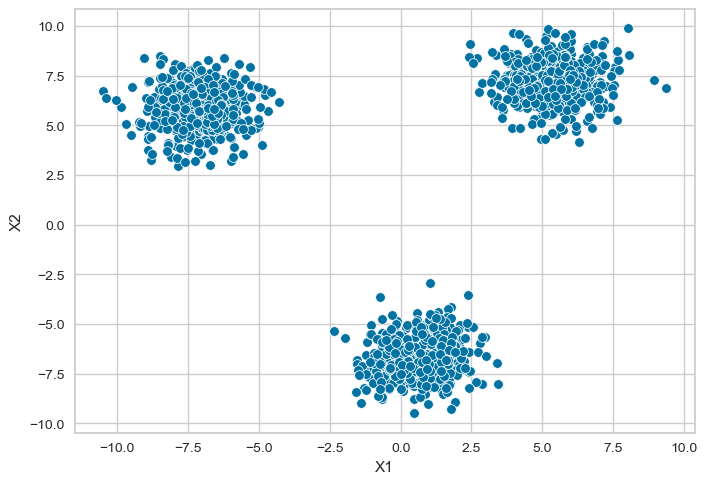

In [21]:
sns.scatterplot(x="X1",y="X2",data=blobs)
plt.show()

In [26]:
moons = pd.read_csv("./cluster_moons.csv")
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


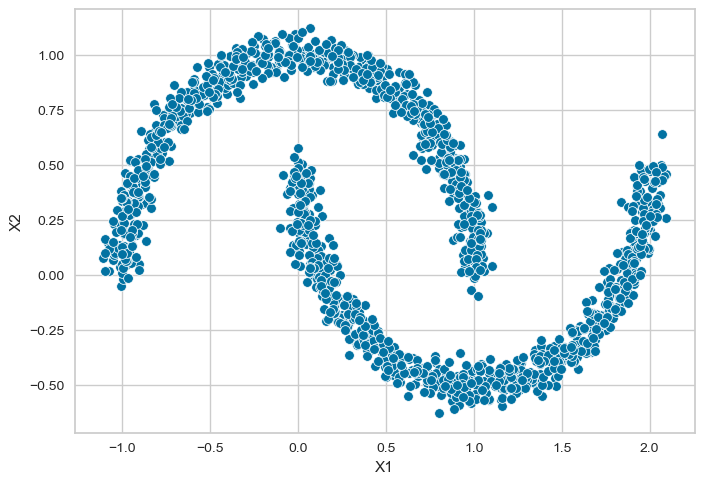

In [28]:
sns.scatterplot(x="X1",y="X2",data=moons)
plt.show()

In [29]:
circles = pd.read_csv("./cluster_circles.csv")
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


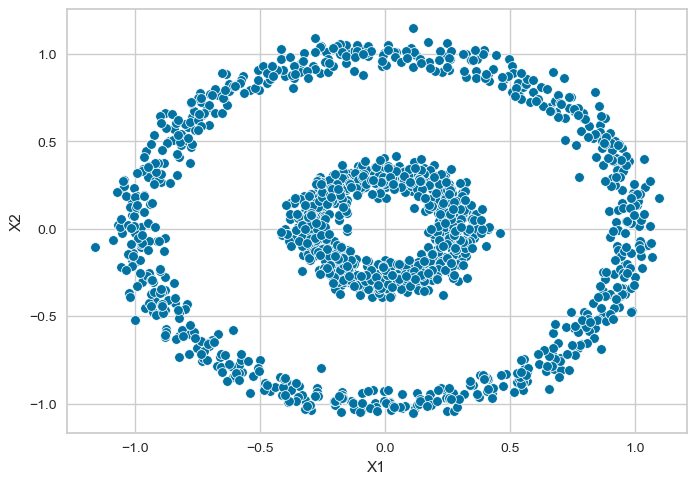

In [30]:
sns.scatterplot(x="X1",y="X2",data=circles)
plt.show()

## 用於顯示群集的散佈圖

In [31]:
def display_mode(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(x="X1",y="X2",hue=labels,data=data,palette="Set1")
    plt.show()

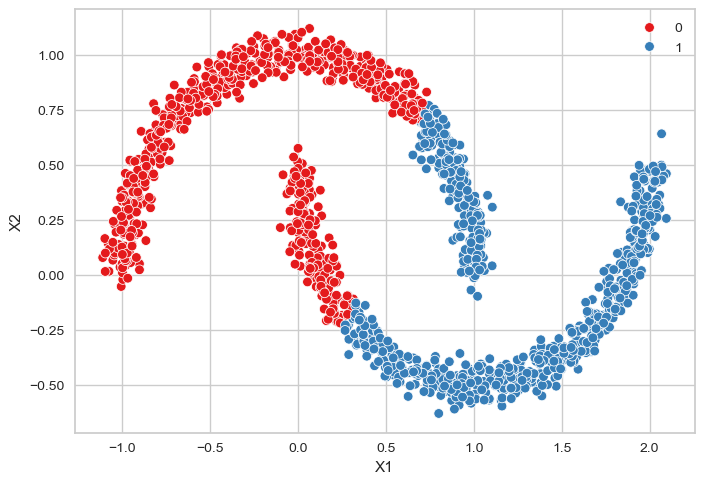

In [32]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='k-means++', n_init='auto')
display_mode(model,moons)

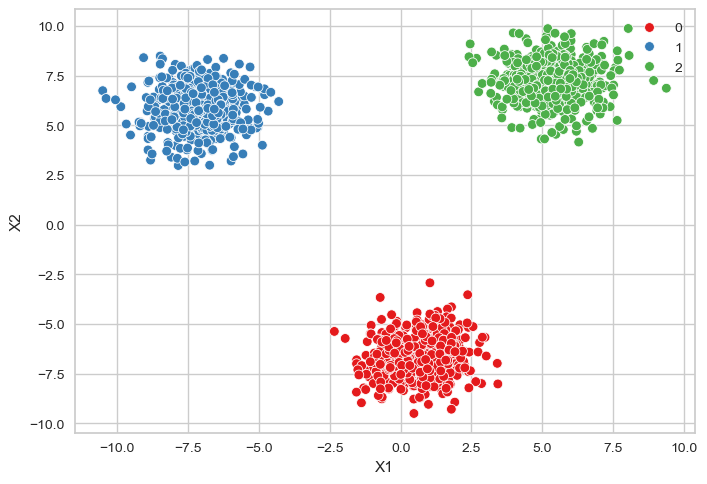

In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
display_mode(model,blobs)

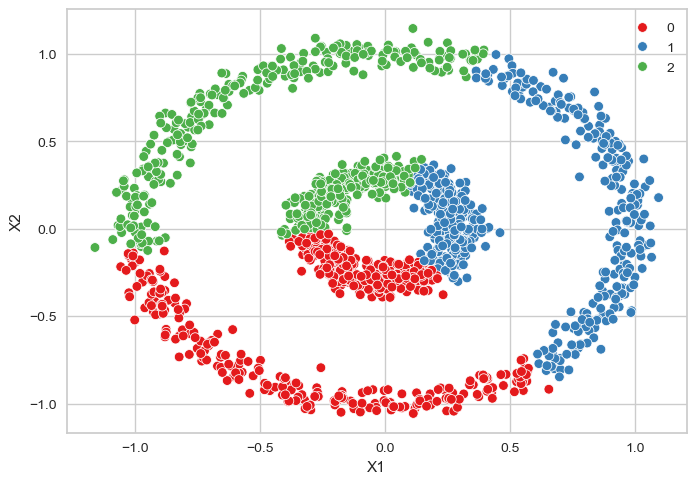

In [34]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
display_mode(model,circles)

## DBSCAN 

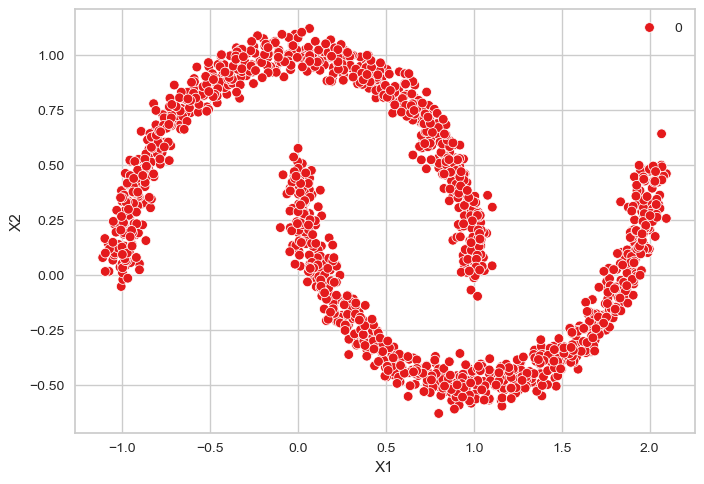

In [35]:
from sklearn.cluster import DBSCAN
mode = DBSCAN(eps=0.3)
display_mode(mode,moons)

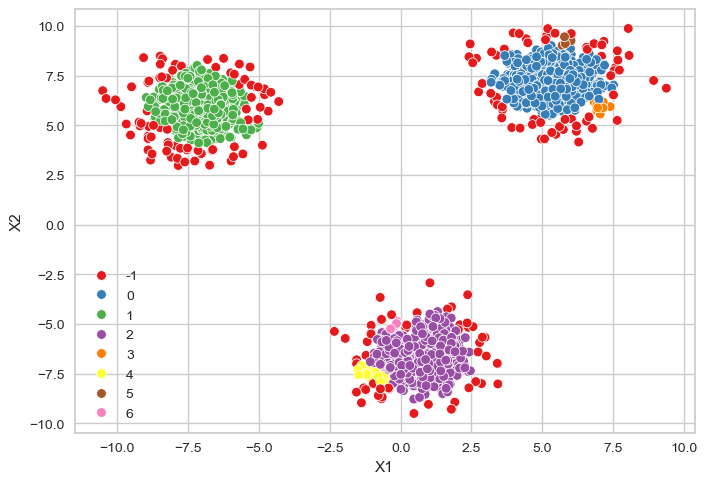

In [36]:
mode = DBSCAN(eps=0.3)
display_mode(mode,blobs)

In [ ]:
from sklearn.metrics import silhouette_score #輪廓係數
eps_values = np.arange(0.1, 3.0, 0.1)
eps_values
# 挑選最好的eps

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])